## Medical Insurance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data =  pd.read_csv('Data/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# get total male and female for each category
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
# get total smoker and non-smoker for each
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Categorical Features:
- Sex
- Smoker
- Region


In [10]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


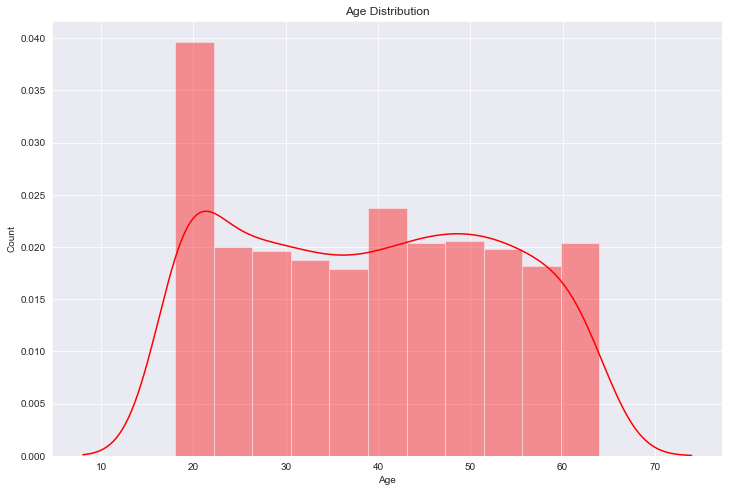

In [11]:
plt.figure(figsize=(12, 8))
sns.distplot(data['age'], color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
data['smoker'].value_counts()/len(data['smoker'])

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [13]:
# what is next?
# we need to convert categorical features into numerical features
# let's define a function to convert a category into a numerical one
def convert_cat_to_num(df, col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    return df

In [14]:
# calling the function for each categorical feature
data = convert_cat_to_num(data,'sex')
data = convert_cat_to_num(data,'smoker')
data = convert_cat_to_num(data,'region')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


In [16]:
X = data.drop('charges', axis=1)
y = data['charges']

In [17]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [18]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# traint the model
regressor = LinearRegression()

In [22]:
regressor.fit(X_test, y_test)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
# checking the accuracy of the model
print('The accuracy of the model is:%.2f%%'% (100 * regressor.score(X_test, y_test)))

The accuracy of the model is:80.38%


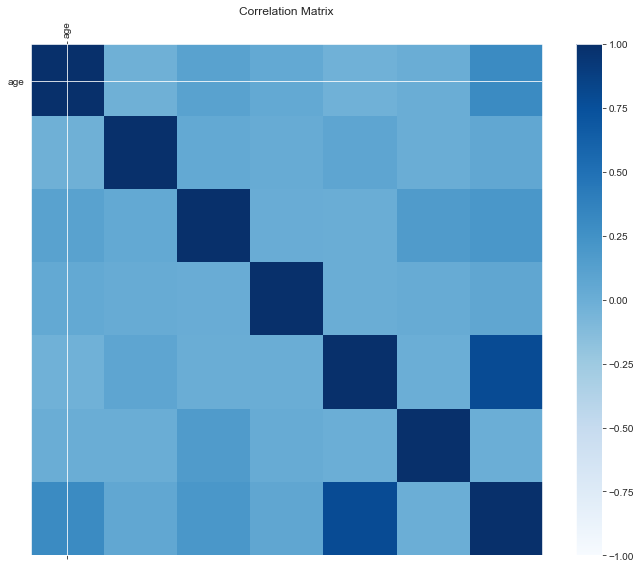

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your pandas DataFrame containing the data

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot correlation matrix
correlation_matrix = data.corr()
im = ax.matshow(correlation_matrix, vmin=-1, vmax=1, cmap=plt.cm.Blues)

# Add colorbar
cbar = fig.colorbar(im)

# Set ticks and labels
ticks = np.arange(0, correlation_matrix.shape[0], 10)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns[ticks])
ax.set_yticklabels(correlation_matrix.columns[ticks])

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set title
ax.set_title('Correlation Matrix')

# Adjust layout to avoid cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

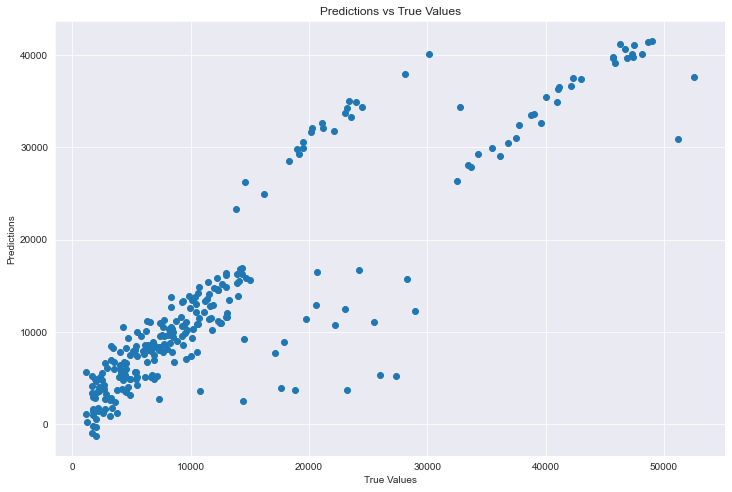

In [35]:
# Now let's plot the predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.show()

In [36]:
# Building a Predictive System

In [37]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[29258.36437079]
The insurance cost is USD  29258.364370787276
